<a href="https://colab.research.google.com/github/JRKagumba/2D-video-pose-estimation-yolov7/blob/main/data/Dataset_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Metrics

### Mount Drive

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import Libraries

In [30]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

### Import DataFrame

In [31]:
data_metrics_file_path = '/content/gdrive/MyDrive/ColabNotebooks/BiomechanicsAnalysis/YOLOv7/running_dataset_athlete_info.csv'
data_metrics = pd.read_csv(data_metrics_file_path)

## Video File Metrics

Text(0.5, 0, 'Duration (s)')

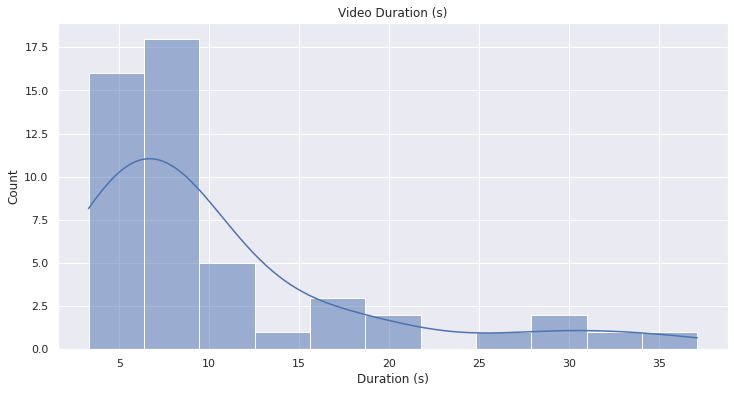

In [32]:
sns.histplot(data=data_metrics, x="Video_Duration_(s)", kde=True)
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Video Duration (s)')
plt.xlabel('Duration (s)')

## Athlete Metrics

In [33]:
data_metrics.head(3)

,Video_Code,Video_Source,Date_of_Recording,Athlete_Name,Sex,Date_of_Birth,Estimated_Age_in_Video,Estimated_Pace,Pace_(m/s),Frame_Rate,Frame_Count,Video_Duration_(s),Estimated_distance_ran,Video_Width,Video_Height
0,running_01,https://www.youtube.com/watch?v=ntCi-xYP7KI,2021-07-29,Paul Chelimo,Male,1990-10-27,30.754909,59s - 400m,6.78,30.0,205.0,6.83,46.3074,1280.0,720.0
1,running_02,https://www.youtube.com/watch?v=B7zTro-FblA,2021-08-28,Ollie Hoare,Male,1997-01-29,24.578191,57s - 400m,7.02,30.0,239.0,7.97,55.9494,600.0,720.0
2,running_03,https://www.youtube.com/watch?v=ijV8AnHvXGw,2022-04-13,Lionel Sanders,Male,1988-02-22,34.138962,4:33 - 1000m,3.66,30.0,497.0,16.57,60.6462,1280.0,676.0


Text(0, 0.5, 'Density')

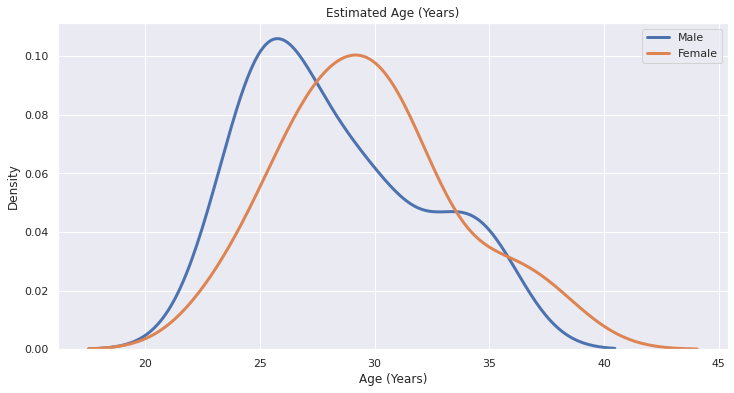

In [41]:
sex_lst = {'Male':'Male', 'Female':'Female'}

for key, value in sex_lst.items():
    # Subset to the sex
    subset = data_metrics[data_metrics['Sex'] == key]
    
    # Draw the density plot
    sns.distplot(subset['Estimated_Age_in_Video'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = value)
    
# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Estimated Age (Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Density')

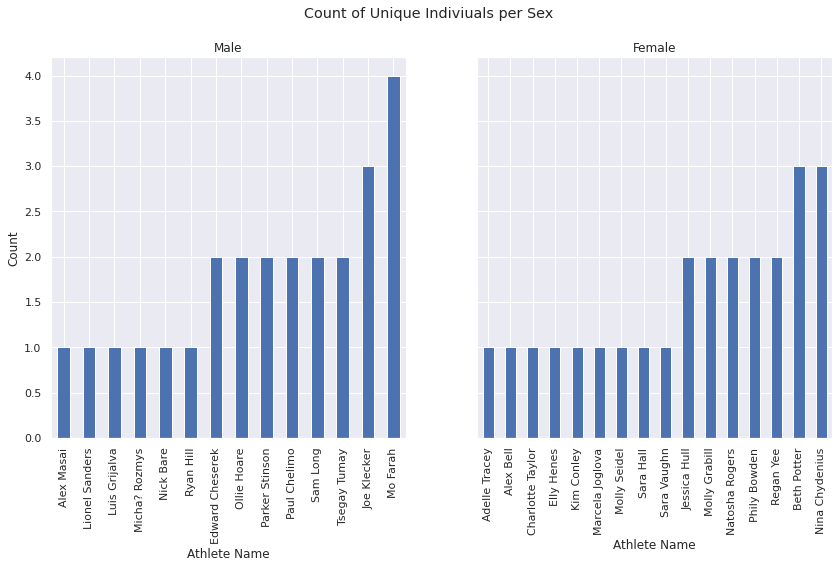

In [78]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(14,7))
fig.suptitle('Count of Unique Indiviuals per Sex')

for index, value in enumerate(['Male','Female']):
  

    df = data_metrics[data_metrics['Sex'] ==  value]

    df.groupby(['Athlete_Name']).size().sort_values().plot(ax=axes[index], kind = "bar")
    # plt.xticks(rotation=30, ha='right')

    axes[index].set_title(value)
    axes[index].set_ylabel('Count')
    axes[index].set_xlabel('Athlete Name')

    # axes[index].tick_params(labelrotation=30)
    # set_xticks(ticks=[],rotation=30, ha='right') 

    

## Gait Metrics

In [79]:
data_metrics.head(3)

,Video_Code,Video_Source,Date_of_Recording,Athlete_Name,Sex,Date_of_Birth,Estimated_Age_in_Video,Estimated_Pace,Pace_(m/s),Frame_Rate,Frame_Count,Video_Duration_(s),Estimated_distance_ran,Video_Width,Video_Height
0,running_01,https://www.youtube.com/watch?v=ntCi-xYP7KI,2021-07-29,Paul Chelimo,Male,1990-10-27,30.754909,59s - 400m,6.78,30.0,205.0,6.83,46.3074,1280.0,720.0
1,running_02,https://www.youtube.com/watch?v=B7zTro-FblA,2021-08-28,Ollie Hoare,Male,1997-01-29,24.578191,57s - 400m,7.02,30.0,239.0,7.97,55.9494,600.0,720.0
2,running_03,https://www.youtube.com/watch?v=ijV8AnHvXGw,2022-04-13,Lionel Sanders,Male,1988-02-22,34.138962,4:33 - 1000m,3.66,30.0,497.0,16.57,60.6462,1280.0,676.0


Text(0.5, 0, 'Pace (m/s)')

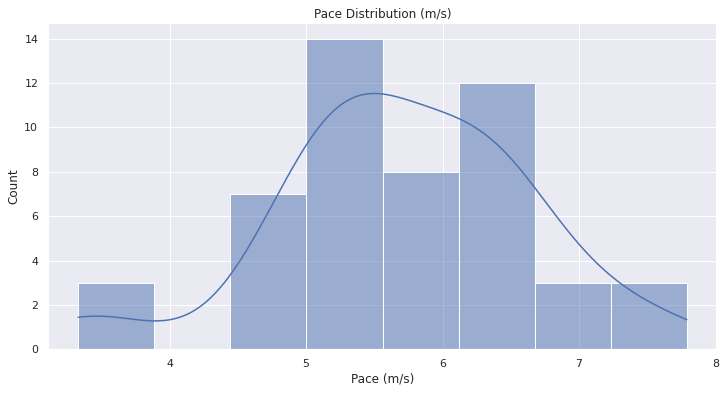

In [80]:
sns.histplot(data=data_metrics, x="Pace_(m/s)", kde=True)
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Pace Distribution (m/s)')
plt.xlabel('Pace (m/s)')

Text(0.5, 0, 'Distance (m)')

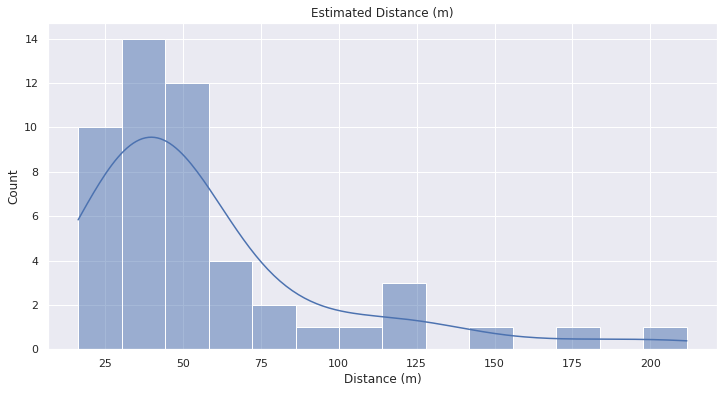

In [81]:
sns.histplot(data=data_metrics, x="Estimated_distance_ran", kde=True)
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Estimated Distance (m)')
plt.xlabel('Distance (m)')